# Introducción a la visualización de datos con Python

## Distintas alternativas para realizar un gráfico

En este apartado estudiamos las distintas alternativas de que disponemos para realizar una gráfica. 

1. Matplotlib (https://matplotlib.org/)
2. Pandas (https://pandas.pydata.org/)
3. Seaborn (https://seaborn.pydata.org/)
4. Plotly (https://plotly.com/)

In [1]:
x = [0, 1, 2, 3]
y = [1, 0, 1, 3]

### 1. Matplotlib

Es la librería básica de visualización en Python.

In [2]:
import matplotlib.pyplot as plt

Forma más inmediata de representar la curva con los puntos $(x,y)$

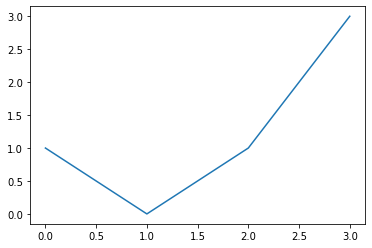

In [3]:
plt.plot(x,y)

Podemos tener más control sobre la figura si creamos el *manejador* de la figura y de los ejes 

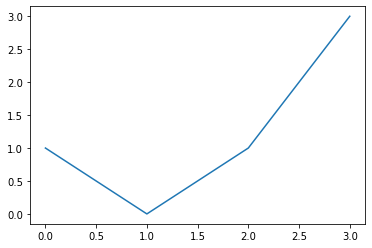

In [4]:
fig, ax = plt.subplots()
ax.plot(x,y)

De este modo podemos etiquetar los ejes, establecer un título, elegir el ancho y color de línea, etc.

Text(0.5, 1.0, 'Nuestro primer gráfico')

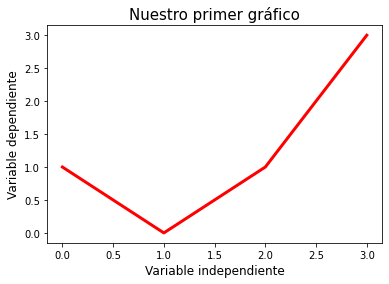

In [5]:
fig, ax = plt.subplots()
ax.plot(x,y, linewidth=3, color='r')
ax.set_xlabel('Variable independiente', fontsize=12)
ax.set_ylabel('Variable dependiente', fontsize=12)
ax.set_title('Nuestro primer gráfico',fontsize=15)

Podemos generar varios ejes en la misma figura, además de configurar el tamaño de la misma. 

Text(0.5, 1.0, 'Figura 4')

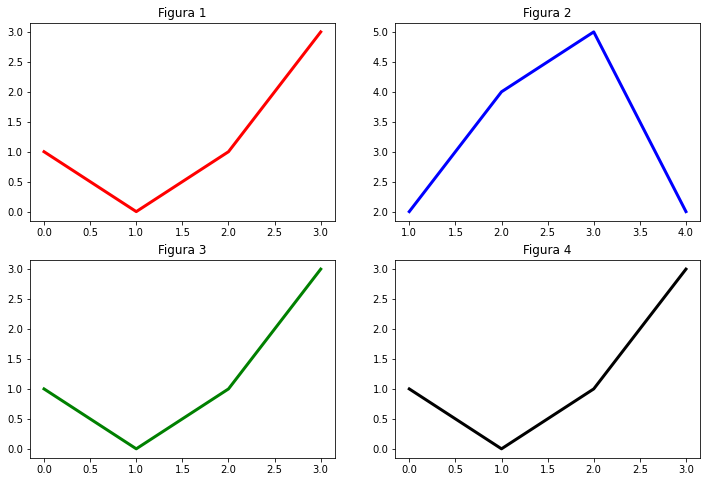

In [6]:
fig, ax = plt.subplots(2,2, figsize=(12,8)) # Axes va a ser una lista 2D de figuras
x2 = [1,2,3,4]
y2 = [2,4,5,2]
ax[0,0].plot(x,y, linewidth=3, color='r')
ax[0,0].set_title('Figura 1')
ax[0,1].plot(x2,y2, linewidth=3, color='b')
ax[0,1].set_title('Figura 2')
ax[1,0].plot(x,y, linewidth=3, color='g')
ax[1,0].set_title('Figura 3')
ax[1,1].plot(x,y, linewidth=3, color='k')
ax[1,1].set_title('Figura 4')


Es también posible hacerlo creando la figura y añadiendo los ejes sobre la marcha

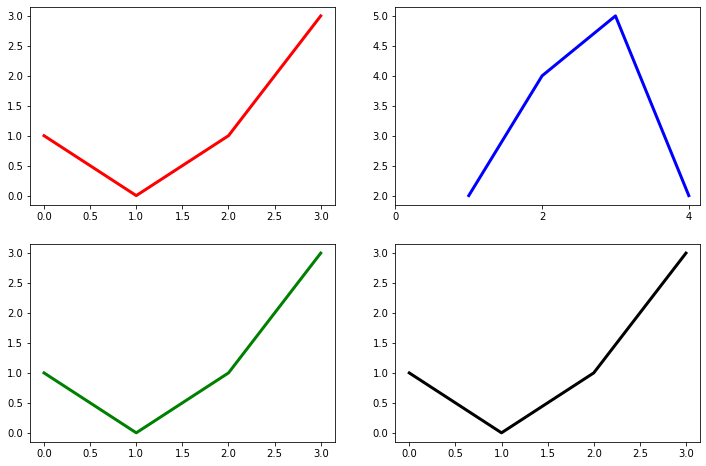

In [12]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(2,2,1) # Esto indica que estamos creando una matriz 2 x 2 ejes y que apuntamos al primero
ax1.plot(x,y, linewidth=3, color='r')
ax2 = fig.add_subplot(2,2,2) 
ax2.plot(x2,y2, linewidth=3, color='b')
ax2.set_xticks([0,2,4])
ax3 = fig.add_subplot(2,2,3) 
ax3.plot(x,y, linewidth=3, color='g')
ax4 = fig.add_subplot(2,2,4)
ax4.plot(x,y, linewidth=3, color='k')
 


Hay mucha versatilidad a la hora de elegir estilos de línea y de combinar distintos tipos de visualizaciones en la misma figura

Text(0.5, 1.0, 'Barras')

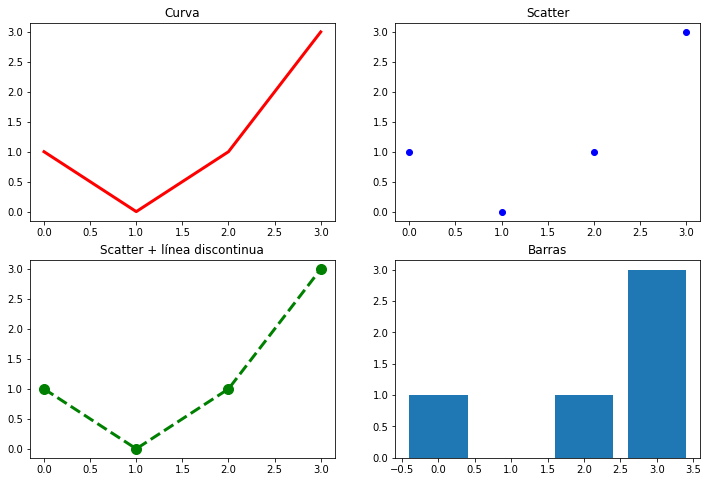

In [13]:
fig, ax = plt.subplots(2,2, figsize=(12,8)) # Axes va a ser una lista 2D de figuras
ax[0,0].plot(x,y, 'r', linewidth=3)
ax[0,0].set_title('Curva')
ax[0,1].plot(x,y,'bo', linewidth=3)
ax[0,1].set_title('Scatter')
ax[1,0].plot(x,y, 'go--', linewidth=3, markersize=10)
ax[1,0].set_title('Scatter + línea discontinua')
ax[1,1].bar(x,y)
ax[1,1].set_title('Barras')

Es posible etiquetar cada curva con una etiqueta para que aparezcan en la leyenda. 

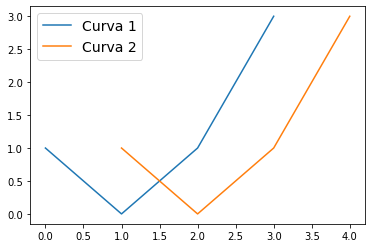

In [14]:
x2 = [1, 2, 3, 4]
y2 = [1, 0, 1, 3]
fig,ax = plt.subplots()
ax.plot(x,y, label='Curva 1')
ax.plot(x2,y2, label='Curva 2')
ax.legend(fontsize=14)

Consultar la documentación (o *stackoverflow*) para funcionalidades referentes a leyendas, ticks, grids, etc. 

### 2. Pandas

Es una librería de procesado de datos, que los organiza en tablas (*dataframes*) lo que permite realizar sobre ellos operaciones típicas de bases de datos relacionales (*join*, *groupby*, etc). 

*Pandas* proporciona funcionalidad de más alto nivel para realizar gráficos a partir de sus dos tipos de datos básicos: *Series* y *DataFrames*

In [8]:
import pandas as pd
import numpy as np


Representación de una serie

In [16]:
s = pd.Series(index=range(50), data = np.random.rand(50))
s.head()

0    0.996677
1    0.035935
2    0.607764
3    0.045156
4    0.220941
dtype: float64

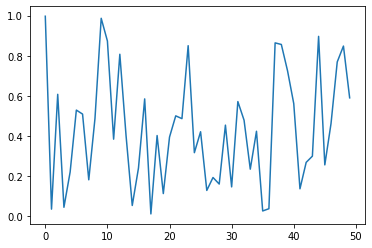

In [17]:
s.plot()

Representación de un DataFrame

In [18]:
L = 50
df = pd.DataFrame(index=range(L), columns=['A','B','C','D'], data = np.random.randn(L,4).cumsum(0))
df.head()

,A,B,C,D
0,0.479944,1.635603,-1.606968,0.642119
1,-0.298865,0.332140,-0.297541,-0.009372
2,1.274877,-0.289686,-0.683138,-2.548715
3,1.849924,0.467535,-0.445939,-2.833969
4,1.384680,-1.983807,-0.305129,-2.529948


El índice de un DataFrame no tiene por qué ser numérico

In [19]:
index = ['fila_'+str(k) for k in range(L)]
df = pd.DataFrame(index=index, columns=['A','B','C','D'], data = np.random.randn(L,4).cumsum(0))
df['C'] = ['valor '+str(k) for k in range(L)]
df.head()

,A,B,C,D
fila_0,0.509743,1.456734,valor 0,-1.851081
fila_1,1.634079,2.076732,valor 1,-0.564172
fila_2,2.387627,-0.320849,valor 2,0.987845
fila_3,3.143426,0.912387,valor 3,-0.071661
fila_4,3.069076,0.594369,valor 4,-1.932800


Podemos seleccionar una fila...

In [20]:
print('Fila con nombre "fila_3":')
print(df.loc['fila_3'])

Fila con nombre "fila_3":
A      3.14343
B     0.912387
C      valor 3
D   -0.0716613
Name: fila_3, dtype: object


... o una columna... 

In [21]:
print('Columna "C":')
print(df['C'].head(5)) # También df.loc[:,'C']


Columna "C":
fila_0    valor 0
fila_1    valor 1
fila_2    valor 2
fila_3    valor 3
fila_4    valor 4
Name: C, dtype: object


 ... o una celda:

In [22]:
print('Elemento en "fila_3" y columna "C":')
print(df.loc['fila_3','C'])

Elemento en "fila_3" y columna "C":
valor 3


Podemos establecer el tamaño de la figura. Muchos de los atributos se heredan de los atributos de matplotlib.

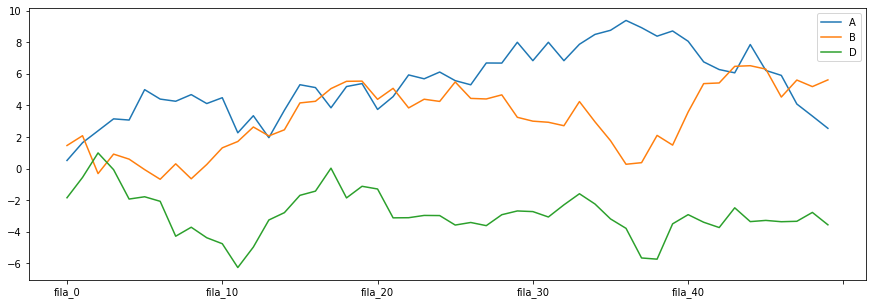

In [24]:
df.plot(figsize=(15,5))

Es posible añadir título, etiquetas, etc. 

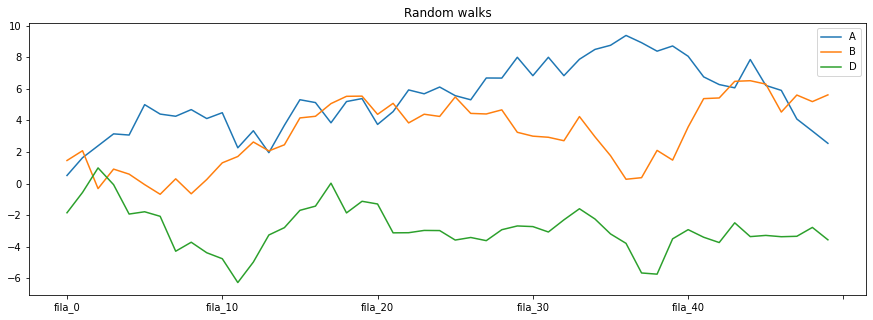

In [25]:
df.plot(title='Random walks', figsize=(15,5))

También es posible usar para la representación unos ejes ya creados con Matplotlib

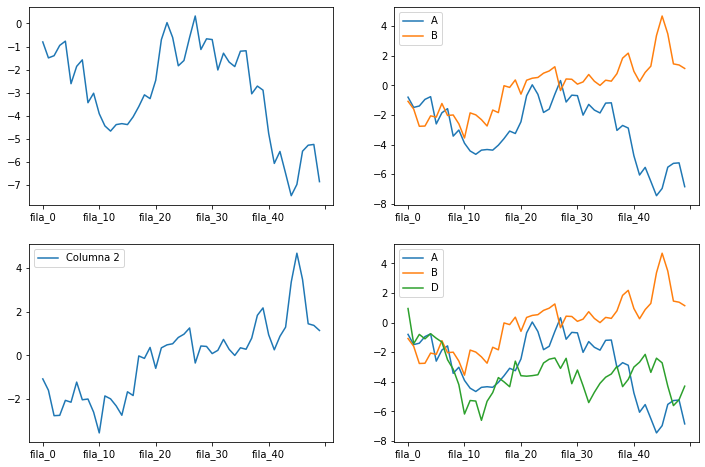

In [25]:
fig, ax = plt.subplots(2,2, figsize=(12,8)) # Axes va a ser una lista 2D de figuras
df['A'].plot(ax=ax[0,0])
df[['A','B']].plot(ax=ax[0,1])
df[['B','C']].rename(columns={'B': 'Columna 2'}).plot(ax=ax[1,0])
df[['A','B','C','D']].plot(ax=ax[1,1])


### 3. Seaborn

Es una librería de visualización específica para aplicaciones estadísticas. 

El siguiente ejemplo muestra cómo representar la correlación entre 2 variables mediante el modelo de regresión lineal entre ambas, así como un margen de confianza de la predicción del modelo. 

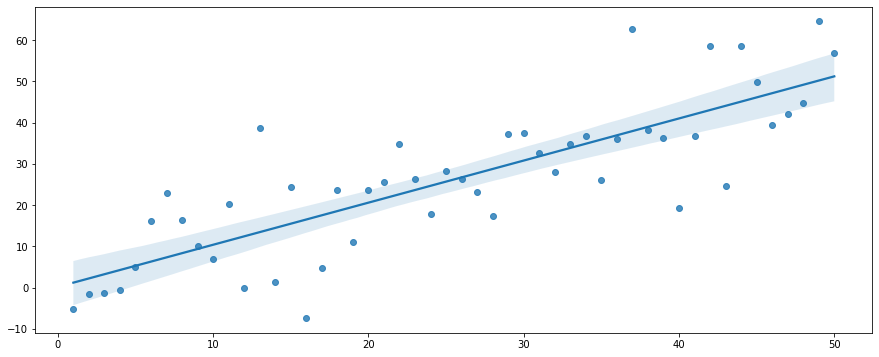

In [9]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,6))
x = np.linspace(1,50, 50)
y = x + 10*np.random.randn(50)
_=sns.regplot(x=x, y=y,ax=ax)

También podemos modelar la distribución de los datos mediante estimadores KDE (*kernel density estimation*). 

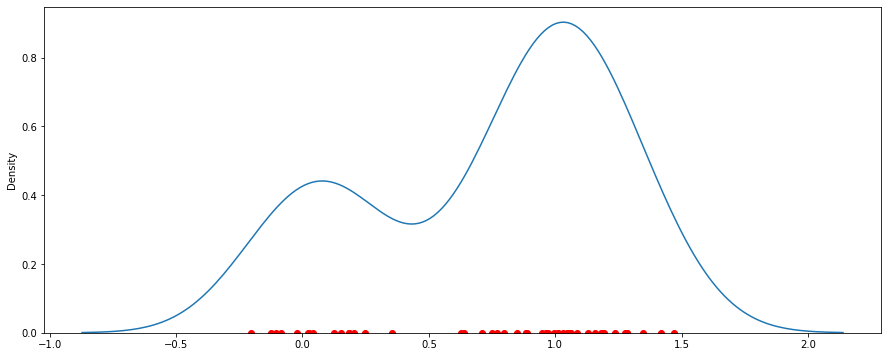

In [27]:
s = np.random.randint(2,size=50)
x = s + .2*np.random.randn(50)
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(x,np.zeros(50),'ro')
sns.kdeplot(x,data=True,ax=ax)

### 4. Plotly 

Es una librería de más alto nivel que permite generar gráficas de forma fácil y al estar construida sobre JavaScript permite su integración fácil en aplicaciones web. 

El siguiente ejemplo está extraído de [aquí](https://plotly.com/python/animations/) y muestra la evolución temporal del PIB y la esperanza de vida de los países. 

In [27]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

In [29]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


## Recursos adicionales

* The Python Graph Gallery (https://www.python-graph-gallery.com/) contiene una extensiva compilación de tipos de gráficos y su correspondiente código usando Matplotlib, Seaborn ó Plotly. 

* The Data Viz Project (https://datavizproject.com/) muestra una galería de infografías que representan distintas tipologías de datos. 